# Importing Libraries

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Creating Dataset

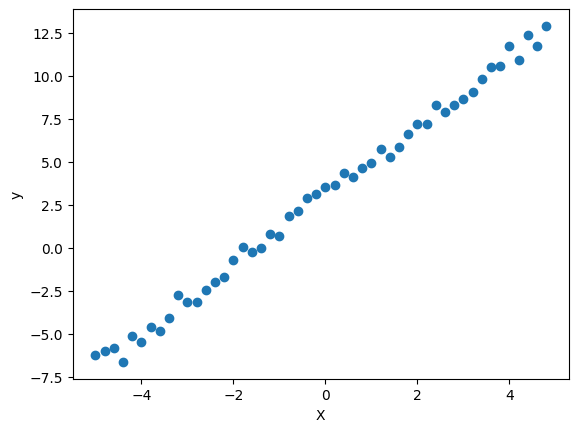

In [10]:
#Using a random seed to make sure that the results are reproducible
torch.manual_seed(42)

#Creating a linear function with slope 2 and intercept 3 with some noise
X = torch.arange(-5, 5, 0.2)
y = 2 * X + 3 + torch.randn(X.size()) * 0.4

#Plotting and visualizing the data points
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Building and Training the Model

In [11]:
# Defining the function for forward pass
def forward(X):
    return w * X + b

# Defining the MSE loss function
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Defining the parameters w, b for y = wx + b
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Setting the learning rate
lr = 0.1

# Setting the number of EPOCHS
EPOCHS = 20

# Empty lists to store the loss, w and b values
losses = []
w_values = []
b_values = []

# Training loop
for i in range(EPOCHS):
    # Making predictions
    y_pred = forward(X)

    # Calculating the loss
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    # Calculating gradients
    loss.backward()

    # Updating parameters
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad


    # Zeroing gradients
    w.grad.zero_()
    b.grad.zero_()

    # Appending the values of w, b
    w_values.append(w.item())
    b_values.append(b.item())

    # Print the progress
    print(f'Epoch: {i + 1}/{EPOCHS}, w: {w.item():.3f}, b: {b.item():.3f}, loss: {loss.item():.3f}')

Epoch: 1/20, w: 3.677, b: 1.563, loss: 57.378
Epoch: 2/20, w: 0.847, b: 1.891, loss: 26.357
Epoch: 3/20, w: 2.744, b: 2.098, loss: 12.275
Epoch: 4/20, w: 1.481, b: 2.301, loss: 5.839
Epoch: 5/20, w: 2.329, b: 2.438, loss: 2.870
Epoch: 6/20, w: 1.765, b: 2.564, loss: 1.485
Epoch: 7/20, w: 2.144, b: 2.655, loss: 0.827
Epoch: 8/20, w: 1.893, b: 2.734, loss: 0.509
Epoch: 9/20, w: 2.062, b: 2.793, loss: 0.351
Epoch: 10/20, w: 1.950, b: 2.843, loss: 0.270
Epoch: 11/20, w: 2.026, b: 2.881, loss: 0.228
Epoch: 12/20, w: 1.976, b: 2.913, loss: 0.205
Epoch: 13/20, w: 2.010, b: 2.938, loss: 0.192
Epoch: 14/20, w: 1.988, b: 2.958, loss: 0.184
Epoch: 15/20, w: 2.003, b: 2.974, loss: 0.180
Epoch: 16/20, w: 1.993, b: 2.987, loss: 0.177
Epoch: 17/20, w: 2.000, b: 2.997, loss: 0.175
Epoch: 18/20, w: 1.996, b: 3.005, loss: 0.174
Epoch: 19/20, w: 1.999, b: 3.012, loss: 0.174
Epoch: 20/20, w: 1.997, b: 3.017, loss: 0.173


# Plotting the Loss vs Epochs

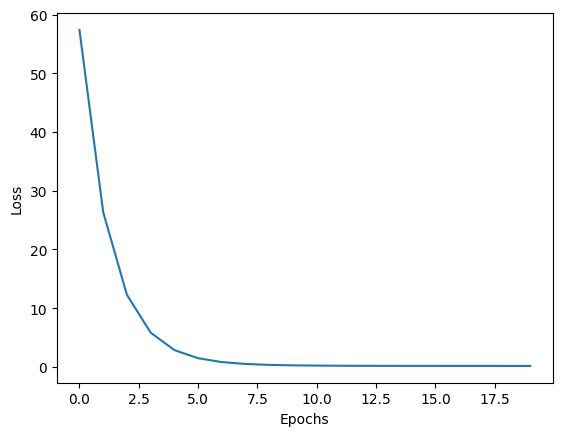

In [12]:
# Plotting the loss vs EPOCHS
plt.plot(range(EPOCHS), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plotting the Parameter Values

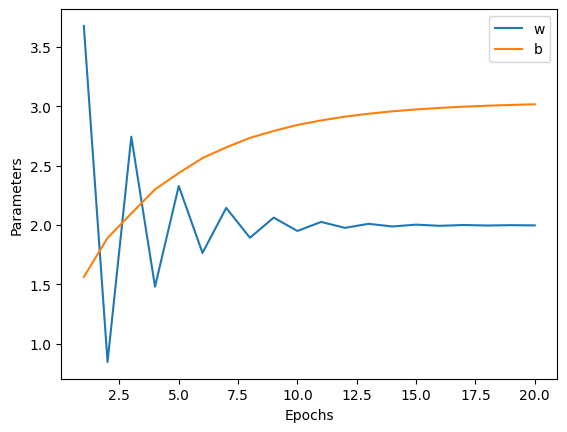

In [13]:
# Plotting the parameter values
plt.plot(range(1, EPOCHS + 1), w_values, label='w')
plt.plot(range(1, EPOCHS + 1), b_values, label='b')
plt.xlabel('Epochs')
plt.ylabel('Parameters')
plt.legend()
plt.show()

# Visualizing the fitted line

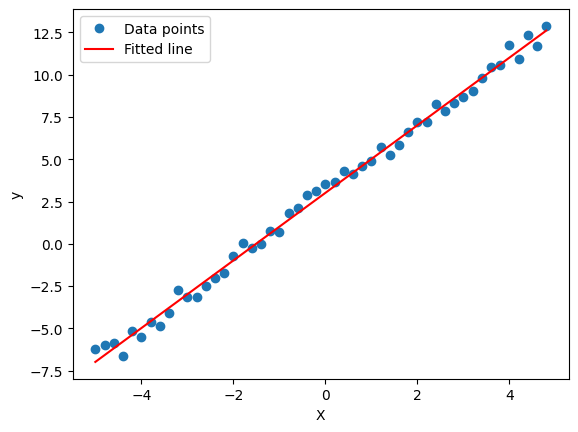

In [14]:
# Visualizing the fitted line
plt.plot(X.numpy(), y.numpy(), 'o', label='Data points')
plt.plot(X.numpy(), y_pred.detach().numpy(), 'r', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()